Setup inicial

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(0)

## Leitura e verficação do dataset

In [8]:
credit = pd.read_csv('fraud/creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Divisão das variáveis dependentes e independentes

In [9]:
credit_x = credit.drop(columns = 'Class')
credit_y = credit['Class']

## Random Forests com e sem a PCA

Preparação dos dados de treino e teste

In [10]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [11]:
X_train, X_test, y_train, y_test = train_test_split(credit_x, credit_y, test_size=0.3) # 70% training and 30% test

### Random Forests com os dados Originais

Accuracy: 0.9995084442259752
Time:  438.8353305


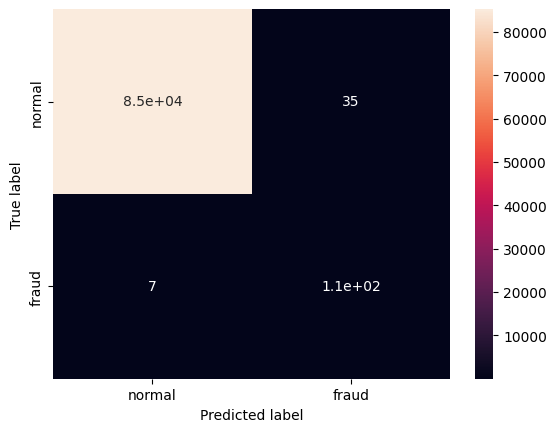

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import timeit

start = timeit.default_timer()

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("Accuracy:",accuracy_score(y_pred, y_test))

cf_Matrix = confusion_matrix(y_pred, y_test)

sns.heatmap(cf_Matrix, annot=True, xticklabels = ['normal', 'fraud'], yticklabels = ['normal', 'fraud'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

stop = timeit.default_timer()

print('Time: ', stop - start)  